# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [20]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df = pd.read_csv(data_dir + "titanic.csv")

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [28]:
df_p = df[(df['class'] == "1st") | (df['class'] == "2nd") | (df['class'] == "3rd")]
pd.crosstab(df_p["class"], df_p["embarked"], margins=True)

embarked,B,C,Q,S,All
class,,,,,
1st,3,143,3,175,324
2nd,6,26,7,245,284
3rd,0,102,113,494,709
All,9,271,123,914,1317


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [33]:
df_conditional_embarked = pd.DataFrame({'B': [0.333, 0.666, 0],
                                        'C': [0.528, 0.096, 0.376],
                                        'Q': [0.024, 0.057, 0.918],
                                        'S': [0.191, 0.268, 0.54]
                                        })
df_conditional_embarked.index = ['1st', '2nd', '3rd']

df_conditional_class = pd.DataFrame({'1st':[.009, .441, .009, .54],
                                     '2nd':[.021, .092, .025, .863],
                                     '3rd':[.0, 14.4, .159, .697]
                                     })
df_conditional_class.index = ['B', 'C', 'Q', 'S']

print(df_conditional_embarked)
print(df_conditional_class)
print("69.7% of 3rd class passengers embarked at Southampton.")
print("54% of Southampton passengers were in 3rd class.")

         B      C      Q      S
1st  0.333  0.528  0.024  0.191
2nd  0.666  0.096  0.057  0.268
3rd  0.000  0.376  0.918  0.540
     1st    2nd     3rd
B  0.009  0.021   0.000
C  0.441  0.092  14.400
Q  0.009  0.025   0.159
S  0.540  0.863   0.697
69.7% of 3rd class passengers embarked at Southampton.
54% of Southampton passengers were in 3rd class.


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

* pros of chart: Higher degree of clarity of information (easier to understand what is going on at a glance)
* cons of chart: There is a loss of specific percentages. You can't make calculations as easily.

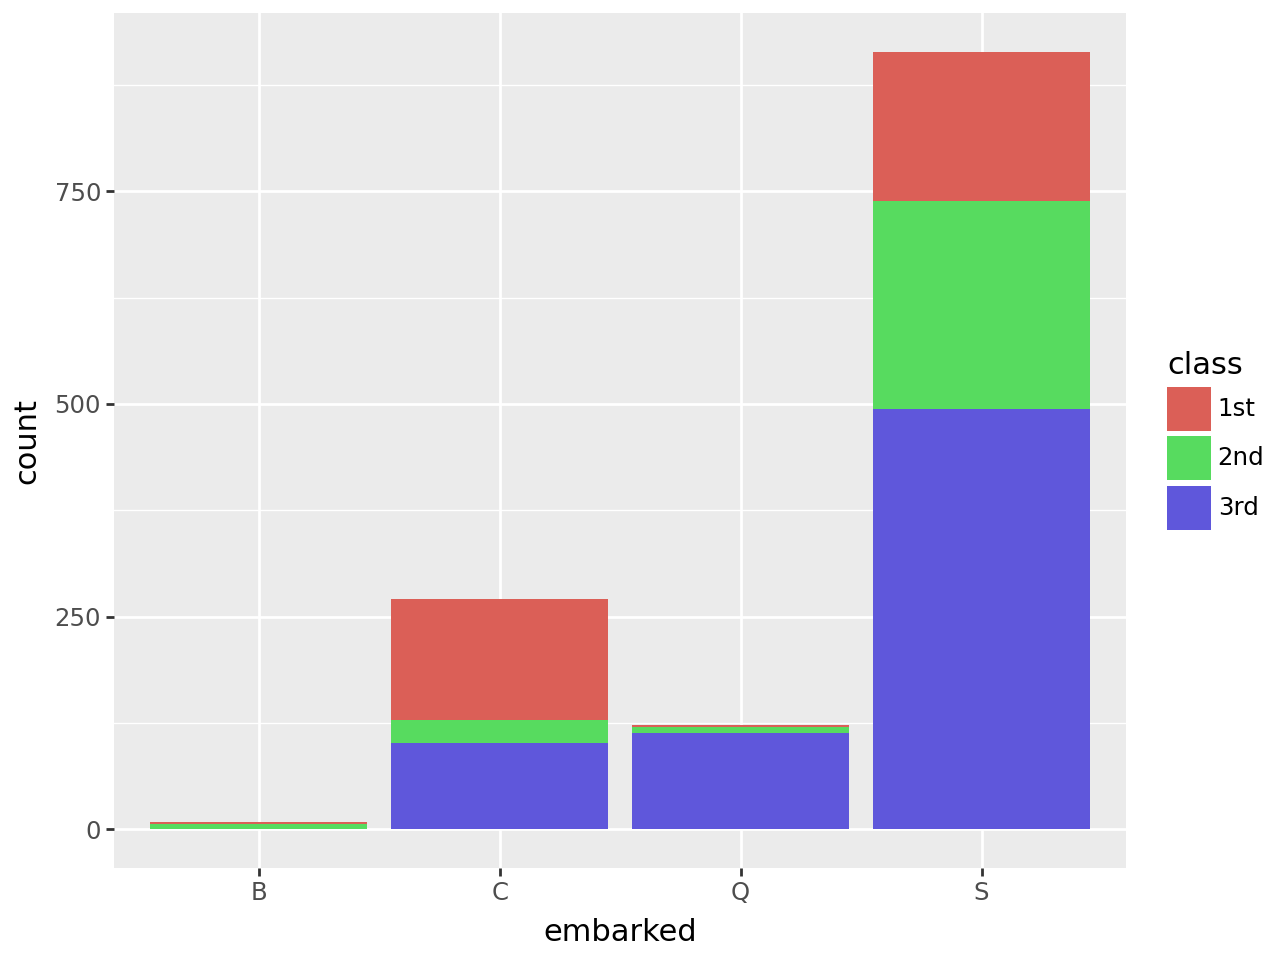

In [35]:
from plotnine import ggplot, aes, geom_bar

(ggplot(df_p, aes(x='embarked', fill='class'))
+ geom_bar()
)